In [86]:
import os
import time
import sys
sys.path.insert(0,'..')
from copy import deepcopy
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from matplotlib import rc
rc('text', usetex=True)

import torch
import torch.nn as nn
from torch.autograd import Variable

%load_ext autoreload
%autoreload 2

from src.data import load_mnist
from src.utils import load_model_net,process_config
from src.analysis import compute_gradient_diversity,\
                        compute_gradients,eval_accuracy,\
                        compute_weight_norm
from src.flatness import compute_flatness
from src.utils import get_num_parameters

from plot import smooth_plot,plot_curve,parse_loss_traj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
dirname = '../experiments/models'
filenames = os.listdir(dirname)

args = process_config('../configs/base.json')
trDL,teDL,net0 = load_model_net(args,root='../data/fashionmnist/',stop=True)
ct = nn.CrossEntropyLoss()

In [83]:
test_accs = []
weight_norms = []

for filename in sorted(filenames):
    net0.load_state_dict(torch.load(
            os.path.join(dirname,filename)
    ))
    teL,teA,teC = eval_accuracy(net0,ct,teDL)
    w_norm = compute_weight_norm(net0)
#     print(filename,teA,w_norm)
    
    if filename.find('wd')!=-1:
        test_accs.append(teA)
        weight_norms.append(w_norm)

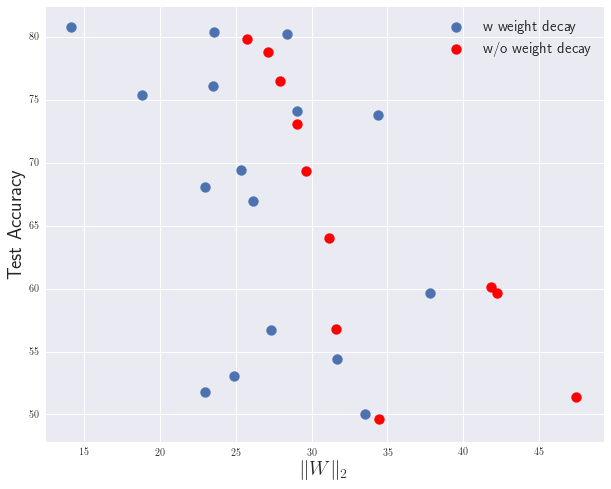

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(weight_norms,test_accs,s=100,label='w weight decay')
plt.scatter(weight_norms_g,test_accs_g,s=100,color='red',label='w/o weight decay')
plt.legend(fontsize=15)
plt.xlabel(r'$\|W\|_2$',fontsize=20)
plt.ylabel(r'Test Accuracy',fontsize=20)

In [100]:
with open('../experiments/fashionmnist_gd/norm.pkl','rb') as f:
    norm_gd = pickle.load(f)
with open('../experiments/fashionmnist_sgd/norm.pkl','rb') as f:
    norm_sgd = pickle.load(f)
    
with open('../experiments/fashionmnist_gd_wd1e-5/norm.pkl','rb') as f:
    norm_gd_wd = pickle.load(f)
with open('../experiments/fashionmnist_sgd_wd1e-5/norm.pkl','rb') as f:
    norm_sgd_wd = pickle.load(f)
    
norm_gd = [t['norm'] for t in norm_gd]
norm_sgd = [t['norm'] for t in norm_sgd]
norm_gd_wd = [t['norm'] for t in norm_gd_wd]
norm_sgd_wd = [t['norm'] for t in norm_sgd_wd]

(20, 32)

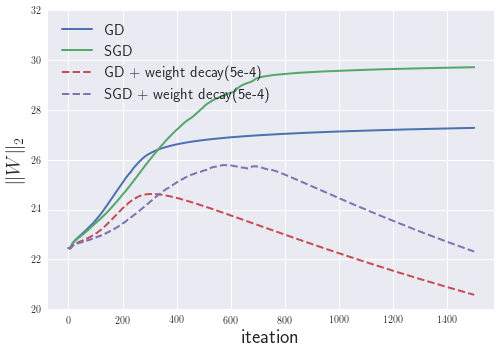

In [112]:
plt.plot(norm_gd,'-',lw=2,label='GD')
plt.plot(norm_sgd,'-',lw=2,label='SGD')
plt.plot(norm_gd_wd,'--',lw=2,label='GD + weight decay(5e-4)')
plt.plot(norm_sgd_wd,'--',lw=2,label='SGD + weight decay(5e-4)')
plt.legend(fontsize=15,loc=2)
plt.xlabel(r'iteation',fontsize=20)
plt.ylabel(r'$\|W\|_2$',fontsize=20)
plt.ylim([20,32])